## Observations and Insights 

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn import datasets
import itertools as it

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
mouse_metadata.describe()

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [4]:
# Checking the number of mice.
number_of_mice = mouse_metadata["Mouse ID"].nunique()
number_of_mice

249

In [5]:
number_of_mice_df = pd.DataFrame([number_of_mice], columns =["Number of Mice"])
number_of_mice_df

,Number of Mice
0,249


In [6]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [7]:
study_results.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [9]:
# Optional: Get all the data for the duplicate mouse ID. 



In [10]:
number_of_mice = study_results["Mouse ID"].nunique()
number_of_mice

249

In [11]:
number_of_mice_df = pd.DataFrame([number_of_mice], columns = ["Number of Mice"])
number_of_mice_df 

,Number of Mice
0,249


In [12]:
# Retrive Mouse ID
mouse_id = study_results.loc[:,["Mouse ID"]]
mouse_id

,Mouse ID
0,b128
1,f932
2,g107
3,a457
4,c819
...,...
1888,r944
1889,u364
1890,p438
1891,x773


In [13]:
# Retrieve Mouse ID drop duplicate
mouse_id = study_results.drop_duplicates()
mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [14]:
# Combining mouse_metadata and study_results into one dataframe
combined_dataframe = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
combined_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_dataframe.drop_duplicates()

## not working

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Checking the number of mice in the clean DataFrame.
combined_dataframe

## not working 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_dataframe = combined_dataframe.groupby("Drug Regimen")
summary_dataframe

In [18]:
# mean of the tumor volume.
mean_of_tumor = summary_dataframe["Tumor Volume (mm3)"].mean()
mean_of_tumor

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# median of the tumor volume.
median_of_tumor = summary_dataframe["Tumor Volume (mm3)"].median()
median_of_tumor

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [20]:
# variance of the tumor volume.
variance_of_tumor = summary_dataframe["Tumor Volume (mm3)"].var
variance_of_tumor

<bound method GroupBy.var of <pandas.core.groupby.generic.SeriesGroupBy object at 0x0000024D565EA320>>

In [21]:
# standard deviation of the tumor volume.
std_of_tumor = summary_dataframe["Tumor Volume (mm3)"].std()
std_of_tumor

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [22]:
# SEM of the tumor volume.
sem_of_tumor = summary_dataframe["Tumor Volume (mm3)"].sem()
sem_of_tumor

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [23]:
# Assemble the resulting series into a single summary dataframe.
summary_grouped_dataframe = pd.DataFrame({"Mean": mean_of_tumor,
                                         "Median": median_of_tumor, 
                                        # "Variance": variance_of_tumor, 
                                         "Standard Deviation": std_of_tumor, 
                                         "SEM": sem_of_tumor})

summary_grouped_dataframe.head()

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

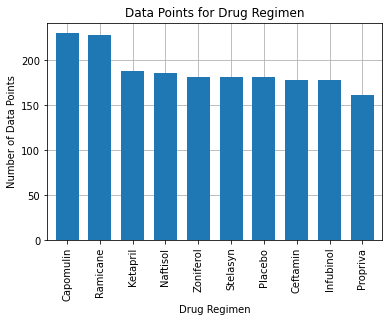

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

bar_plot = combined_dataframe["Drug Regimen"].value_counts().plot.bar(width=0.7, zorder=3)

# X Axis 
bar_plot.set_xlabel("Drug Regimen")

# Y Axis 
bar_plot.set_ylabel("Number of Data Points")

# Title
bar_plot.set_title("Data Points for Drug Regimen")

# Grid 
bar_plot.grid(zorder=0)

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Gender breakdown of mice 

gender_data = combined_dataframe["Sex"].value_counts()
gender_data

Male      958
Female    935
Name: Sex, dtype: int64

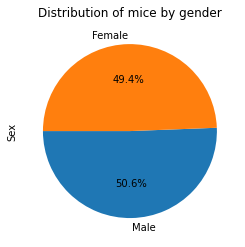

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_plot = gender_data.plot.pie(autopct="%1.1f%%", startangle=180, title="Distribution of mice by gender")


In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_data = combined_dataframe["Sex"].value_counts()
gender_data

Male      958
Female    935
Name: Sex, dtype: int64

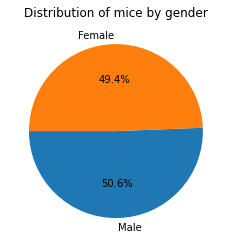

In [48]:
plt.pie(gender_data, labels=gender_data.index.values, autopct="%1.1f%%", startangle=180)
plt.title("Distribution of mice by gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [59]:
# Start by getting the last (greatest) timepoint for each mouse

greatest_time_point = pd.DataFrame(combined_dataframe.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={"Timepoint": "Greatest Timepoint"})
greatest_time_point


,Mouse ID,Greatest Timepoint
0,t573,0
1,u153,0
2,d133,0
3,n482,0
4,o848,0
...,...,...
244,k894,45
245,l471,45
246,l509,45
247,i177,45


In [63]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_greatest_time_point_original = pd.merge(combined_dataframe, greatest_time_point, on="Mouse ID")
merge_greatest_time_point_original

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,45
1889,z969,Naftisol,Male,9,30,30,65.841013,3,45
1890,z969,Naftisol,Male,9,30,35,69.176246,4,45
1891,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [68]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftami"]


In [ ]:
# Create empty list to fill with tumor vol data (for plotting)
drug_regimen = []

In [73]:
Capomulin_dataframe = combined_dataframe.loc[combined_dataframe["Drug Regimen"] == "Capomulin",:]
Ramicane_dataframe = combined_dataframe.loc[combined_dataframe["Drug Regimen"] == "Ramicane",:]
Infubinol_dataframe = combined_dataframe.loc[combined_dataframe["Drug Regimen"] == "Infubinol",:]
Ceftami_dataframe = combined_dataframe.loc[combined_dataframe["Drug Regimen"] == "Ceftami",:]


In [76]:
# Capomulin
Capomulin_last = Capomulin_dataframe.groupby("Mouse ID").max()["Timepoint"]
Capomulin_volumn = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_volumn, combined_dataframe, on=("Mouse ID", "Timepoint"), how="left")
Capomulin_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [103]:
# Calculate the Capomulin IQR and quantitatively determine if there are any potential outliers
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles = Capomulin_tumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The IQR of Capomulin tumors: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} might be outliers ")
print(f"Values above {upper_bound} might be outliers ")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The IQR of Capomulin tumors: 7.781863460000004
Values below 20.70456164999999 might be outliers 
Values above 51.83201549 might be outliers 


In [104]:
# Ramicane
Ramicane_last = Ramicane_dataframe.groupby("Mouse ID").max()["Timepoint"]
Ramicane_volumn = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_volumn, combined_dataframe, on=("Mouse ID", "Timepoint"), how="left")
Ramicane_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [105]:
# Calculate the Ramicane IQR and quantitatively determine if there are any potential outliers
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles = Ramicane_tumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The IQR of Ramicane tumors: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} might be outliers ")
print(f"Values above {upper_bound} might be outliers ")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The IQR of Ramicane tumors: 9.098536719999998
Values below 17.912664470000003 might be outliers 
Values above 54.30681135 might be outliers 


In [106]:
# Infubinol
Infubinol_last = Infubinol_dataframe.groupby("Mouse ID").max()["Timepoint"]
Infubinol_volumn = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_volumn, combined_dataframe, on=("Mouse ID", "Timepoint"), how="left")
Infubinol_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [107]:
# Calculate the Infubinol IQR and quantitatively determine if there are any potential outliers

Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles = Infubinol_tumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The IQR of Infubinol tumors: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} might be outliers ")
print(f"Values above {upper_bound} might be outliers ")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The IQR of Infubinol tumors: 11.477135160000003
Values below 36.83290494999999 might be outliers 
Values above 82.74144559000001 might be outliers 


In [108]:
# Ceftami
Ceftami_last = Ceftami_dataframe.groupby("Mouse ID").max()["Timepoint"]
Ceftami_volumn = pd.DataFrame(Infubinol_last)
Ceftami_merge = pd.merge(Ceftami_volumn, combined_dataframe, on=("Mouse ID", "Timepoint"), how="left")
Ceftami_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [111]:
# Calculate the Ceftami IQR and quantitatively determine if there are any potential outliers

Ceftami_tumors = Ceftami_merge["Tumor Volume (mm3)"]

quartiles = Ceftami_tumors.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftami tumors: {lowerq}")
print(f"The upper quartile of Ceftami tumors: {upperq}")
print(f"The IQR of Ceftami tumors: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} might be outliers ")
print(f"Values above {upper_bound} might be outliers ")

The lower quartile of Ceftami tumors: 54.04860769
The upper quartile of Ceftami tumors: 65.52574285
The IQR of Ceftami tumors: 11.477135160000003
Values below 36.83290494999999 might be outliers 
Values above 82.74144559000001 might be outliers 


In [ ]:
# Locate the rows which contain mice on each drug and get the tumor volumes

In [ ]:
# add subset 

In [ ]:
# Determine outliers using upper and lower bounds

ValueError: Dimensions of labels and X must be compatible

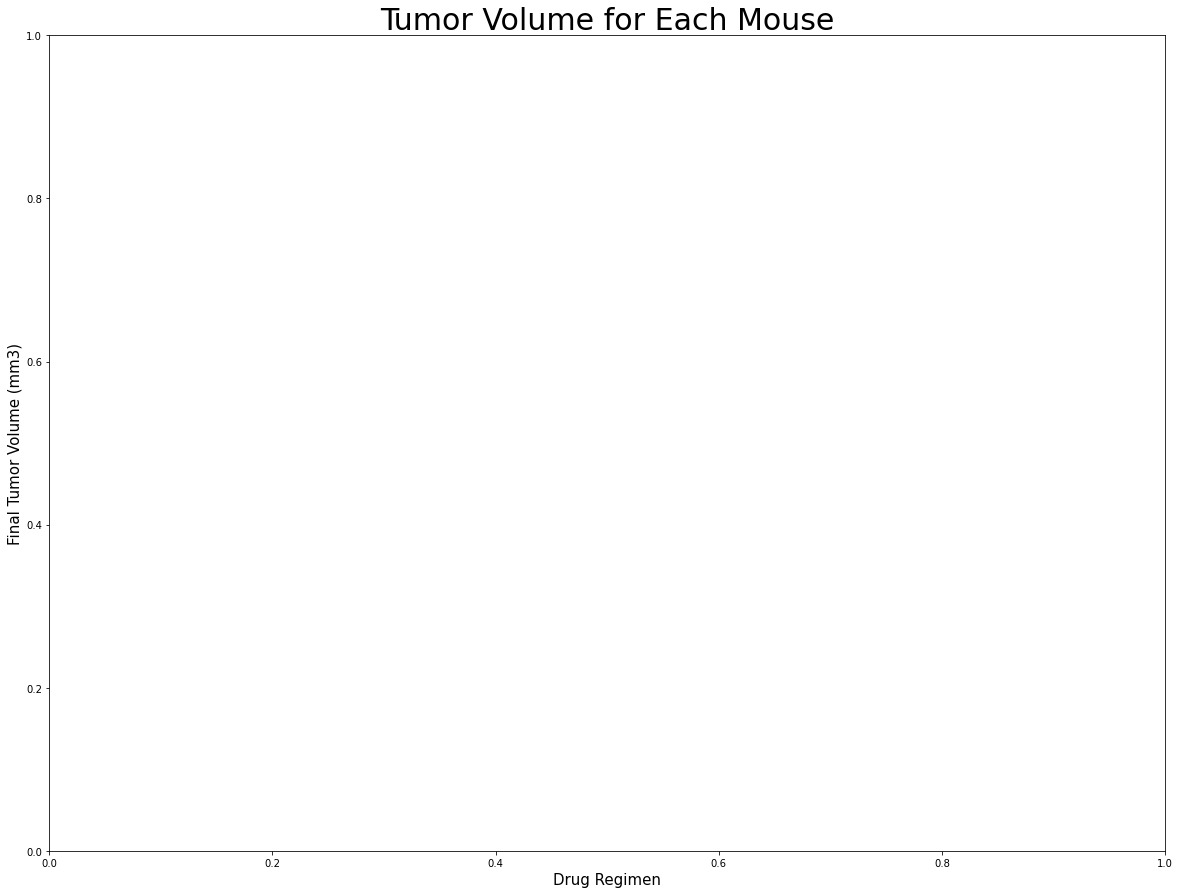

In [137]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_plot = ["Capomulin_tumors", "Ramicane_tumors", "Infubinol_tumors", "Ceftami_tumors"]
drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftami"]

fig1, ax1 = plt.subplots(figsize=(20,15))
ax1.set_title("Tumor Volume for Each Mouse", fontsize = 30)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontsize = 15)
ax1.set_xlabel("Drug Regimen", fontsize = 15)
ax1.boxplot(box_plot, labels = drug_names, widths = 15, patch_artist = True, vert = True)

plt.ylim(10,80)
plt.show()

## BOX PLOT NOT WORKING 

## Line and Scatter Plots

In [141]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# picked mouse w150 at random

mouse_selected = Capomulin_dataframe.loc[Capomulin_dataframe["Mouse ID"] == "w150",:]
mouse_selected


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
338,w150,Capomulin,Male,23,23,0,45.000000,0
339,w150,Capomulin,Male,23,23,5,39.202129,0
340,w150,Capomulin,Male,23,23,10,39.952347,0


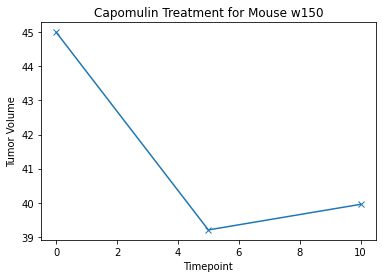

In [147]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# picked mouse w150 at random

plt.plot(mouse_selected["Timepoint"], mouse_selected["Tumor Volume (mm3)"], marker = "x")

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Capomulin Treatment for Mouse w150")

plt.show()

In [151]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_dataframe = combined_dataframe.loc[combined_dataframe["Drug Regimen"] == "Capomulin"]
Capomulin_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [154]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# average tumor volume

average_tumor_volume = pd.DataFrame(Capomulin_dataframe.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "average_tumor_volume"})
average_tumor_volume

,Mouse ID,average_tumor_volume
0,s185,34.559143
1,m601,34.847470
2,x401,36.182040
3,f966,36.505973
4,r554,36.509212
5,y793,38.506829
6,m957,39.049816
7,i738,39.141053
8,t565,39.328725
9,u364,39.887495


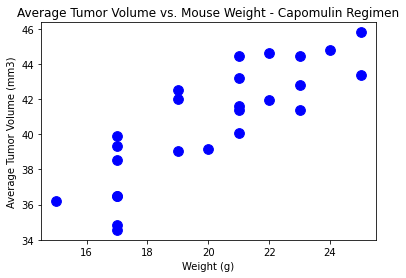

In [179]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# average tumor volume
average_capomulin_volume = Capomulin_dataframe.groupby(["Mouse ID"]).mean()
plt.scatter(average_capomulin_volume["Weight (g)"], average_capomulin_volume["Tumor Volume (mm3)"], s = 95, color = "blue")
plt.title("Average Tumor Volume vs. Mouse Weight - Capomulin Regimen")
plt.xlabel("Weight (g)", fontsize = 10)
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 10)
plt.show()

## Correlation and Regression

In [182]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(average_capomulin_volume["Weight (g)"],average_capomulin_volume["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [196]:
x_values = average_capomulin_volume["Weight (g)"]
y_values = average_capomulin_volume["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"slope:{slope}")
print(f"intercept: {intercept}")
print(f"rvalue (Correlation Coefficient): {rvalue}")
print(f"pandas (Correlation Coefficient): {correlation}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept: 21.552160532685015
rvalue (Correlation Coefficient): 0.8419363424694718
pandas (Correlation Coefficient): 0.84
stderr:0.1275435903320134
y = 0.95x + 21.55


AttributeError: 'tuple' object has no attribute 'annotate'

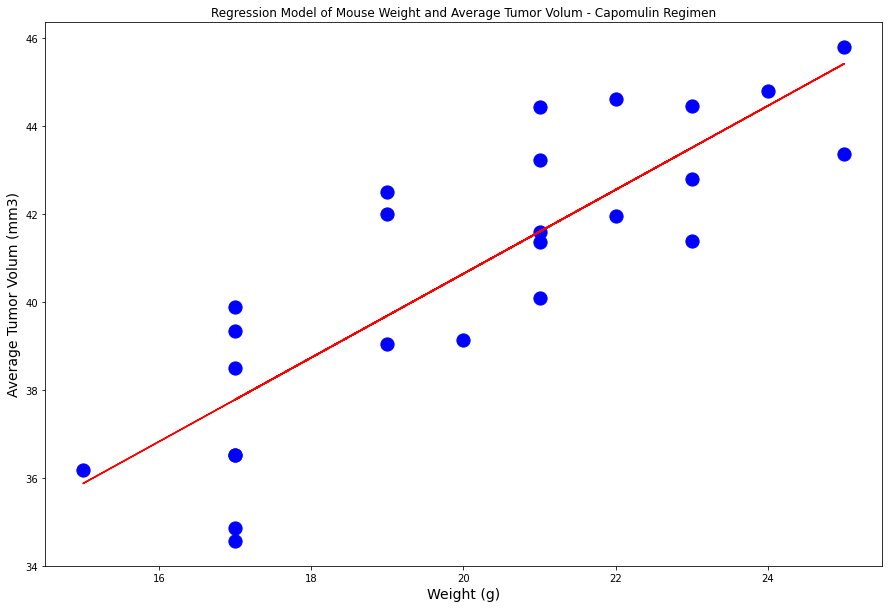

In [200]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
axl = plt.subplots(figsize = (15, 10))
plt.scatter(x_values, y_values, s = 175, color = "blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Regression Model of Mouse Weight and Average Tumor Volum - Capomulin Regimen")
plt.xlabel("Weight (g)", fontsize = 14)
plt.ylabel("Average Tumor Volum (mm3)", fontsize = 14)
axl.annotate(line_eq, xy=(20,40), xycoords="data", xytext=(0.8,0.95), textcoords = "axes fraction", horizontalalignment="right", vertizalalignment="top", fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

## GRAPH NOT WORKING